In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import warnings
warnings.simplefilter('ignore')

In [4]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link = 'https://drive.google.com/file/d/1wgZGbB9niZUFhFf8w4vXhYKio2UCSxPv/view?usp=sharing'

id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('aerofit_treadmill.txt')

## 1. Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset


---



In [6]:
df = pd.read_csv('aerofit_treadmill.txt')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


## 1.(a): The data type of all columns in the “customers” table.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


**Insights ▶** From the above analysis, it is clear that, data has total of 9 features with mixed alpha numeric data. Also we can see that there is no missing data in the columns.




---



## 1.(b): You can find the number of rows and columns given in the dataset

In [8]:
df.shape

(180, 9)

**Insights ▶** we can observe that there are 180 rows and 9 columns in dataset.



---



## 1.(c) : Check for the missing values and find the number of missing values in each column

In [9]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

**Insights ▶** observed that there is no missing values in any column.



---



---


## 2. Detect Outliers

2. (a) : Find the outliers for every continuous variable in the dataset

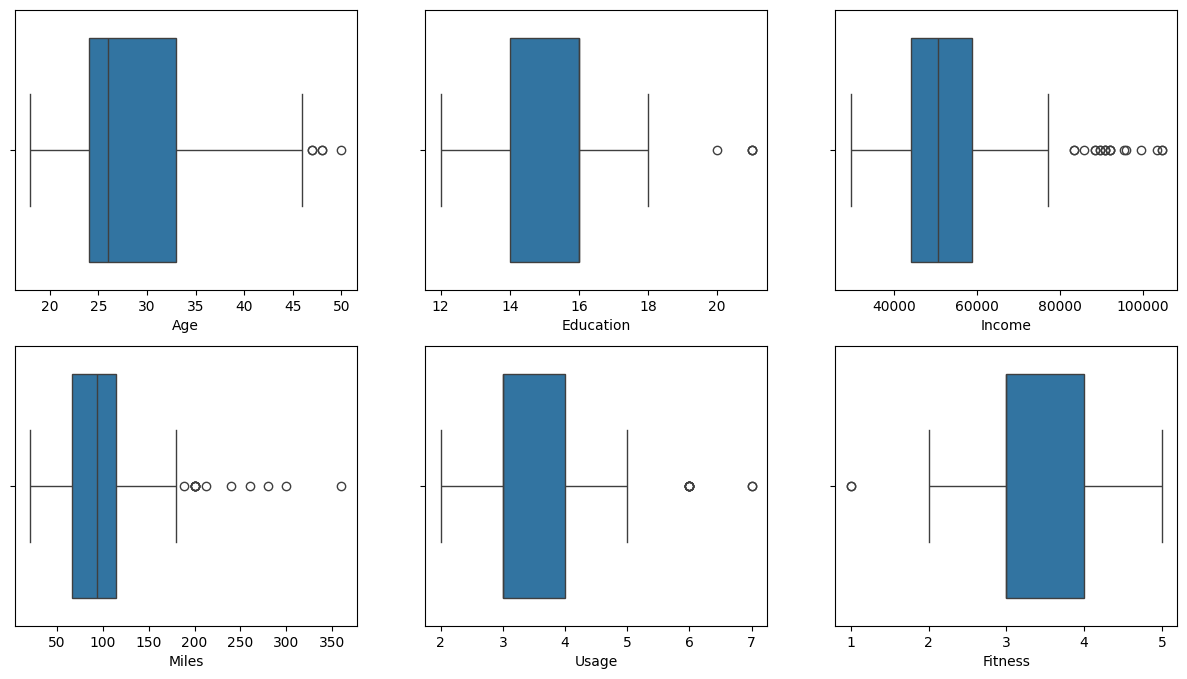

In [10]:
#define plotting region (2 rows, 3 columns)
fig,axes=plt.subplots(2,3,figsize=(15,8))
sns.boxplot(data=df,x='Age',ax=axes[0,0])
sns.boxplot(data=df,x='Education',ax=axes[0,1])
sns.boxplot(data=df,x='Income',ax=axes[0,2])
sns.boxplot(data=df,x='Miles',ax=axes[1,0])
sns.boxplot(data=df,x='Usage',ax=axes[1,1])
sns.boxplot(data=df,x='Fitness',ax=axes[1,2])
plt.show()

**Insights ▶** we can  observed 3 outliers in age ,2 outliers in education , 11 in income, 8 in Miles, 2 in Usage, 1 in Fitness.



---
## 3. Check if features like marital status, Gender, and age have any effect on the product purchased


---



3. (a) : Find if there is any relationship between the categorical variables and the output variable in the data.

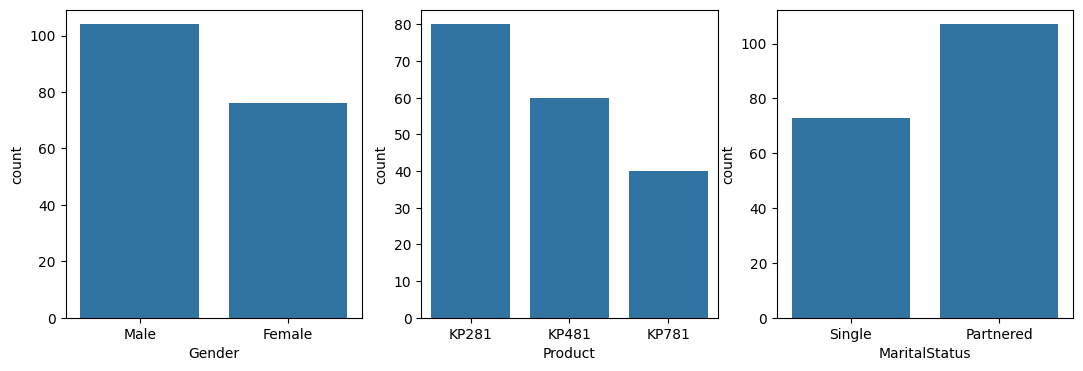

In [11]:
fig,axes=plt.subplots(1,3,figsize=(13,4))
sns.countplot(data=df,x='Gender',ax=axes[0])
sns.countplot(data=df,x='Product',ax=axes[1])
sns.countplot(data=df,x='MaritalStatus', ax=axes[2])

plt.show()

**3.(b) :** Find if there is any relationship between the continuous variables and the output variable in the data.

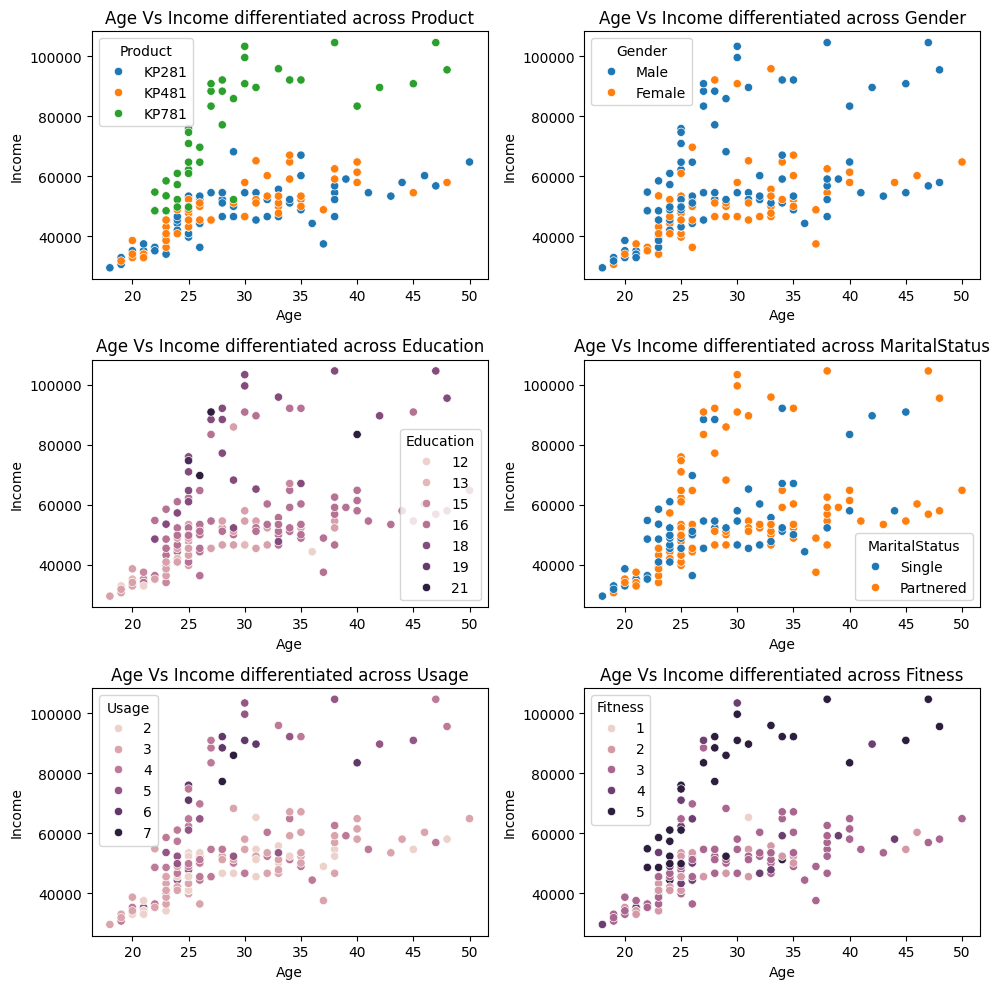

In [12]:
col_list = ['Product','Gender','Education','MaritalStatus','Usage','Fitness']
fig,axes = plt.subplots(nrows=3,ncols=2,figsize=(10, 10))
axes = axes.flatten()
i = 0
for col in col_list:
    sns.scatterplot(data=df,x='Age',y='Income',hue=col,ax=axes[i])
    axes[i].set_title(f"Age Vs Income differentiated across {col}")
    i += 1
fig.tight_layout()
plt.show()


Insights ▶
*    Income is increasing as the age increasing. But there are some
exceptional people who got higher salary in there early age only.
*   As per given product protfolio information KP781 is costliest treadmill --> that's why only people with highest income borrowing it.
*   Males tends to get more higher salary than Females.






---
**4. Representing the Probability**



---



## Find the marginal probability (what percent of customers have purchased KP281, KP481, or KP781)

**4.(a)** probabilty of product w.r.t Gender

In [13]:
# customer distrubution between gender and product
pd.crosstab(index=df['Product'],columns=df['Gender'],margins=True,normalize=True).round(2)

Gender,Female,Male,All
Product,,,
KP281,0.22,0.22,0.44
KP481,0.16,0.17,0.33
KP781,0.04,0.18,0.22
All,0.42,0.58,1.00


**Insights ▶** 1. The Probability of a treadmill being purchased by a female is 42% .

2. The Probability of a treadmill being purchased by a male is 58% .



---





---

4.(b) Probabilty of product w.r.t marital status

In [14]:
pd.crosstab(index=df['Product'],columns=df['MaritalStatus'],margins=True,normalize=True).round(2)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,0.27,0.18,0.44
KP481,0.20,0.13,0.33
KP781,0.13,0.09,0.22
All,0.59,0.41,1.00


**Insights ▶** 1. The Probability of a treadmill being purchased by a Married Customer is 59% .

2. The Probability of a treadmill being purchased by a Unmarried Customer is 41% .


**4.(c)** probabilty of product w.r.t fitness

In [15]:
pd.crosstab(index =df['Product'],columns = df['Fitness'],margins = True,normalize = True ).round(2)

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,0.01,0.08,0.30,0.05,0.01,0.44
KP481,0.01,0.07,0.22,0.04,0.00,0.33
KP781,0.00,0.00,0.02,0.04,0.16,0.22
All,0.01,0.14,0.54,0.13,0.17,1.00


**Insights ▶** 1. The Probability of a treadmill being purchased by a customer with Average(3) Fitness is 54% .

2. The Probability of a treadmill being purchased by a customer with Fitness of 2,4,5 is almost 15% .
3. The Probability of a treadmill being purchased by a customer with very low(1) Fitness is only 1%



---



---



---



---



###Find the conditional probability that an event occurs given that another event has occurred. (Example: given that a customer is female, what is the probability she’ll purchase a KP481)

*product wrt gender for conditonal probabilty check*

In [16]:
pd.crosstab(index=df['Product'],columns=df['Gender'],margins=True,normalize=True).round(2)

Gender,Female,Male,All
Product,,,
KP281,0.22,0.22,0.44
KP481,0.16,0.17,0.33
KP781,0.04,0.18,0.22
All,0.42,0.58,1.00


**Insights ▶** The conditional probability of purchasing the treadmill model given that the customer is female is:


*   For Treadmill model KP281 - 22%
*   For Treadmill model KP481 - 16%
*   For Treadmill model KP781 - 4%

The conditional probability of purchasing the treadmill model given that the customer is male is -

*   For Treadmill model KP281 - 22%
*   For Treadmill model KP481 - 17%
*   For Treadmill model KP781 - 18%



*probabilty product w.r.t marital status for conditional probabilty*

In [17]:
pd.crosstab(index=df['Product'],columns=df['MaritalStatus'],margins=True,normalize=True).round(2)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,0.27,0.18,0.44
KP481,0.20,0.13,0.33
KP781,0.13,0.09,0.22
All,0.59,0.41,1.00


**Insights ▶** The conditional probability of purchasing the treadmill model given that the customer is Married is :

*   For Treadmill model KP281 - 27%
*   For Treadmill model KP481 - 20%
*   For Treadmill model KP781 - 13%

The conditional probability of purchasing the treadmill model given that the customer is Unmarried is -

*   For Treadmill model KP281 - 18%
*   For Treadmill model KP481 - 13%
*   For Treadmill model KP781 - 9%

*Conditional probabilty check product w.r.t fitness*

In [18]:
pd.crosstab(index =df['Product'],columns = df['Fitness'],margins = True,normalize = True ).round(2)

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,0.01,0.08,0.30,0.05,0.01,0.44
KP481,0.01,0.07,0.22,0.04,0.00,0.33
KP781,0.00,0.00,0.02,0.04,0.16,0.22
All,0.01,0.14,0.54,0.13,0.17,1.00


**Insights ▶** The conditional probability of purchasing the treadmill model given that the customer has Average Fitness is -

*   For Treadmill model KP281 - 30%
*   For Treadmill model KP481 - 22%
*   For Treadmill model KP781 - 2%



---



---





---

**5. Check the correlation among different factors**


---



Find the correlation between the given features in the table.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


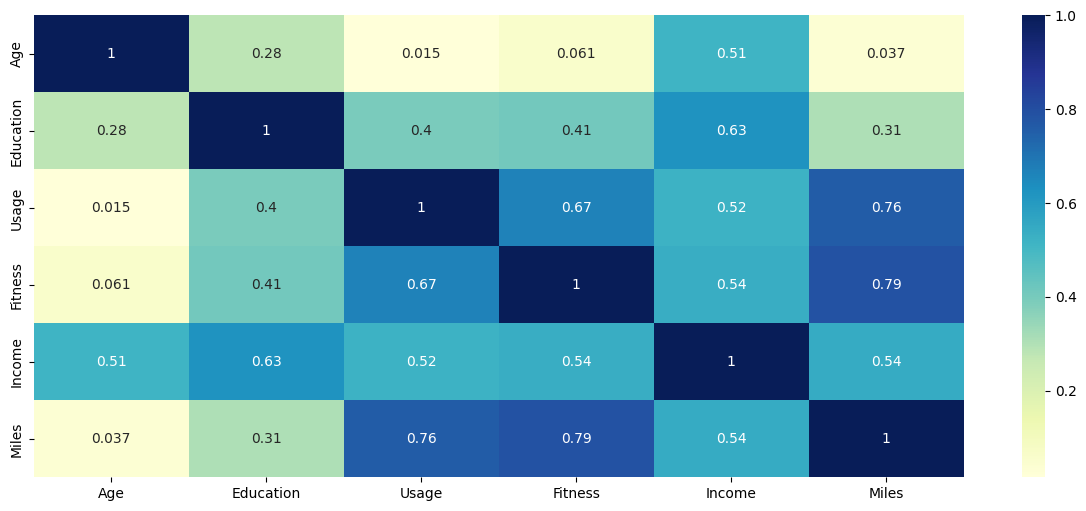

In [20]:
# since 3 columns(product,gender,marital status) are strings , dropping them to visualize with integer data only
df_copy=df.copy()
df_copy=df_copy.drop(['Product','Gender','MaritalStatus'],axis=1)

#plot a figure
plt.figure(figsize=(15,6))
sns.heatmap(df_copy.corr(),annot=True,cmap='YlGnBu')
plt.show()

**Insights ▶** Eductaion and Income are highly correlated as its obvious. Eductation also has significatnt correlation between Fitness rating and Usage of the
treadmill.
Usage is highly correlated with Fitness and Miles as more the usage more the fitness and mileage.




---

##**6. Customer profiling and recommendation**


---



# Make customer profilings for each and every product.

Based on above analysis ▶

*   Probability of purchase of KP281 = 44%
*   Probability of purchase of KP481 = 33%
*   Probability of purchase of KP781 = 22%

**Customer Profile for KP281 Treadmill:**
* Age of customer mainly between 18 to 35 years with few between 35 to 50 years
* Education level of customer 13 years and above
* Fitness Scale - 2 to 4

**Customer Profile for KP481 Treadmill :**
* Age of customer mainly between 18 to 35 years with few between 35 to 50 years
* Education level of customer 13 years and above
* Fitness Scale - 2 to 4

**Customer Profile for KP781 Treadmill :**
* Gender - Male
* Age of customer between 18 to 35 years
* Education level of customer 15 years and above
* Fitness Scale - 3 to 5



---



---



---



 ## Write a detailed recommendation from the analysis that you have done.

1) **Marketing Campaigns for KP781 :**
The KP784 model exhibits a significant sales disparity in terms of gender, with only 18% of total sales attributed to female customers. To enhance this metric, it is
recommended to implement targeted strategies such as offering special promotions and trials exclusively designed for the female customers.

2) Given the target customer's age, education level, and income, it's important to offer the KP281 and KP481 Treadmill at an affordable price point. Additionally, consider
providing flexible payment plans that allow customers to spread the cost over several months. This can make the treadmill more accessible to customers with varying
budgets.


3) Create a user-friendly app that syncs with the treadmill. This app could track users' weekly running mileage, provide real-time feedback on their progress, and offer
personalized recommendations for workouts based on their fitness scale and goals.This can enhance the overall treadmill experience and keep users engaged.




---

